In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
da,dp=pd.read_excel("data.xlsx",sheet_name=0),pd.read_excel("data.xlsx",sheet_name=1)

In [3]:
dp

,90,80,70,60,50,40,30,20,10,0,-10,-20,-30
0,1.450,1.500,1.340,1.110,0.852,0.68200,0.515,0.407,0.355,0.344,0.355,0.389,0.541
1,1.590,1.640,1.350,1.095,0.783,0.64673,0.519,0.400,0.370,0.365,0.362,0.383,0.551
2,1.490,1.551,1.419,1.083,0.822,0.67800,0.508,0.398,0.351,0.353,0.371,0.394,0.555
3,1.514,1.517,1.370,1.077,0.853,0.67700,0.522,0.387,0.361,0.311,0.360,0.407,0.547
4,1.508,1.529,1.395,1.117,0.800,0.69400,0.512,0.410,0.355,0.364,0.354,0.404,0.538
5,1.482,1.605,1.286,NaN,0.810,0.64300,0.497,0.402,0.379,0.355,0.364,0.363,0.534
6,1.467,1.645,1.257,NaN,0.862,0.63000,0.508,0.418,0.358,0.348,0.362,0.401,0.530
7,NaN,NaN,1.459,NaN,0.829,0.65600,0.520,0.425,0.349,0.339,0.372,0.408,0.547
8,NaN,NaN,NaN,NaN,0.729,0.61000,0.504,0.407,NaN,0.350,0.348,0.398,NaN
9,NaN,NaN,NaN,NaN,0.775,0.66500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


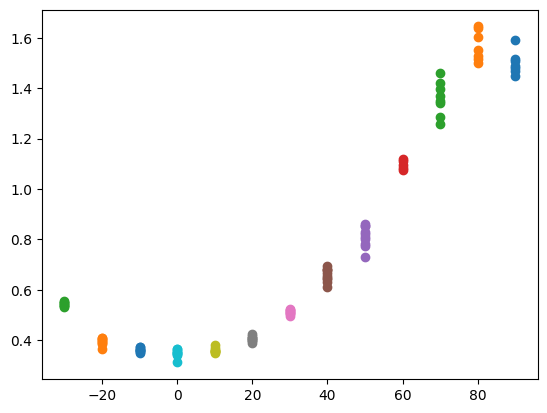

In [4]:
fig,ax=plt.subplots()
for c in dp.columns:
    #print(dp[c].dropna())
    ax.scatter([c]*(dp[c].dropna().shape[0]),dp[c].dropna())

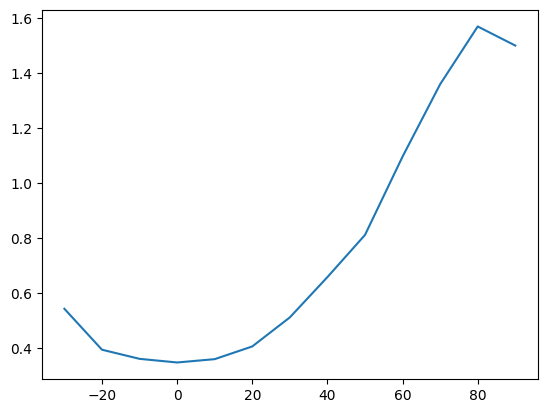

In [5]:
plt.plot(dp.mean())

In [6]:
Y=np.array(dp.mean())
X=np.array([90,80,70,60,50,40,30,20,10,0,-10,-20,-30])

In [7]:
np.array(dp[90].dropna())

array([1.45 , 1.59 , 1.49 , 1.514, 1.508, 1.482, 1.467])

In [8]:
Xp=np.array([])
Yp=np.array([])
for c in dp.columns:
    #print(dp[c].dropna())
    Xp=np.append(Xp,[c]*(dp[c].dropna().shape[0]))
    Yp=np.append(Yp,np.array(dp[c].dropna()))
Xp,Yp

(array([ 90.,  90.,  90.,  90.,  90.,  90.,  90.,  80.,  80.,  80.,  80.,
         80.,  80.,  80.,  70.,  70.,  70.,  70.,  70.,  70.,  70.,  70.,
         60.,  60.,  60.,  60.,  60.,  50.,  50.,  50.,  50.,  50.,  50.,
         50.,  50.,  50.,  50.,  40.,  40.,  40.,  40.,  40.,  40.,  40.,
         40.,  40.,  40.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,
         30.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  10.,
         10.,  10.,  10.,  10.,  10.,  10.,  10.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., -10., -10., -10., -10., -10., -10.,
        -10., -10., -10., -20., -20., -20., -20., -20., -20., -20., -20.,
        -20., -30., -30., -30., -30., -30., -30., -30., -30.]),
 array([1.45   , 1.59   , 1.49   , 1.514  , 1.508  , 1.482  , 1.467  ,
        1.5    , 1.64   , 1.551  , 1.517  , 1.529  , 1.605  , 1.645  ,
        1.34   , 1.35   , 1.419  , 1.37   , 1.395  , 1.286  , 1.257  ,
        1.459  , 1.11   , 1.095  , 1.083  , 1.077  , 1.11

In [9]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * np.sin(x*np.pi/180)**2+b

In [10]:
popt, pcov = curve_fit(func, Xp, Yp)
popt, pcov

(array([1.18973428, 0.26487857]),
 array([[ 0.00055658, -0.00021372],
        [-0.00021372,  0.00015002]]))

In [11]:
perr = np.sqrt(np.diag(pcov))
perr/popt

array([0.01982952, 0.04624037])

In [12]:
popt[1]*180/np.pi, popt[2], 

IndexError: index 2 is out of bounds for axis 0 with size 2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


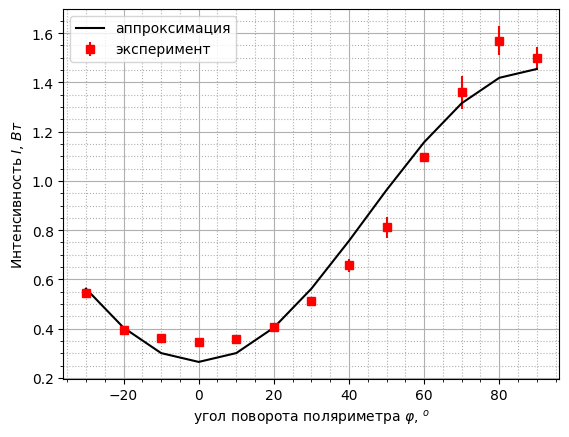

In [13]:
fig,ax=plt.subplots()
avs=np.array([])
errs=np.array([])
for c in dp.columns:
    #print(dp[c].dropna())
    avs=np.append(avs,dp[c].dropna().mean())
    av=dp[c].dropna().mean()
    errs=np.append(errs,np.sqrt(np.sum((dp[c].dropna()-av)**2)/(dp[c].dropna().shape[0]-1)))
ax.errorbar(dp.columns,avs,yerr=errs, fmt="s", color="red", label="эксперимент")
ax.plot(X, func(X, *popt),color="black", label="аппроксимация")
ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
ax.set_ylabel(r"Интенсивность $I$, $Вт$")
ax.set_xlabel(r"угол поворота поляриметра $\varphi$, $^o$")
ax.legend()
fig.savefig("I.eps")

In [16]:
errs

array([0.04541082, 0.05986055, 0.06675114, 0.01708215, 0.04138505,
       0.02608898, 0.00823104, 0.01118034, 0.01012423, 0.01615549,
       0.00780135, 0.01430423, 0.00860959])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


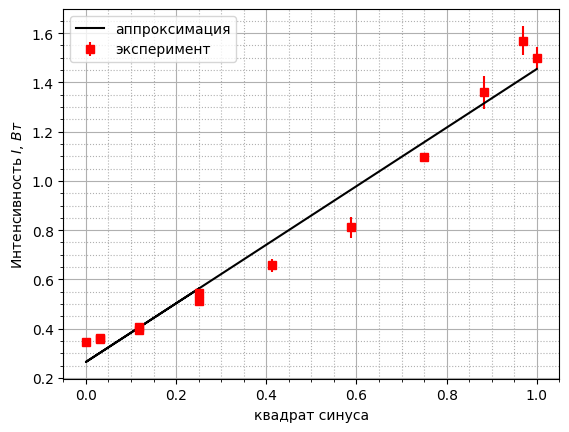

In [15]:
fig,ax=plt.subplots()
avs=np.array([])
errs=np.array([])
for c in dp.columns:
    #print(dp[c].dropna())
    avs=np.append(avs,dp[c].dropna().mean())
    av=dp[c].dropna().mean()
    errs=np.append(errs,np.sqrt(np.sum((dp[c].dropna()-av)**2)/(dp[c].dropna().shape[0]-1)))
ax.errorbar(np.sin(dp.columns*np.pi/180)**2,avs,yerr=errs, fmt="s", color="red", label="эксперимент")
ax.plot(np.sin(X*np.pi/180)**2, func(X, *popt),color="black", label="аппроксимация")
ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
ax.set_ylabel(r"Интенсивность $I$, $Вт$")
ax.set_xlabel(r"квадрат синуса")
ax.legend()
fig.savefig("I2.eps")

In [21]:
np.sqrt(np.sum((func(dp.columns,*popt)-avs)**2)/dp.columns.shape[0])/np.average(avs)

0.10287146750911347

In [92]:
errs,avs

(array([1.03496418, 1.11057332, 0.87555706, 0.61909547, 0.28616398,
        0.12430339, 0.03410946, 0.14560773, 0.19603047, 0.20767903,
        0.19318301, 0.15843498, 0.00860959]),
 array([1.50014286, 1.56957143, 1.3595    , 1.0964    , 0.8115    ,
        0.658173  , 0.51166667, 0.406     , 0.35975   , 0.34766667,
        0.36088889, 0.39411111, 0.542875  ]))

In [ ]:
fig,ax=plt.subplots()
avs=np.array([])
errs=np.array([])
for c in dp.columns:
    #print(dp[c].dropna())
    avs=np.append(avs,dp[c].dropna().mean())
    av=dp[c].dropna().mean()
    errs=np.append(errs,np.sqrt(np.sum((dp[c].dropna()-av)**2)/(dp[c].dropna().shape[0]-1)))
ax.errorbar(dp.columns,avs,yerr=errs, fmt="s", color="red", label="эксперимент")
ax.plot(X, func(X, *popt),color="black", label="аппроксимация")
ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
ax.set_ylabel(r"Интенсивность $I$, $Вт$")
ax.set_xlabel(r"угол поворота поляриметра $\varphi$, $^o$")
ax.legend()
fig.savefig("I.eps")